# Курс по Python

## Задание 1 

С помощью списков создать таблицу chemical_data, содержащую информацию по 1-ому, 3, 4, 5 и 6 элементам таблицы Менделеева - порядковый номер, название, атомная масса (в целых числах).
Добавить в табличку информацию о 2-ом элементе.

In [1]:
chemical_data = [
    [1, 'H', 1], 
    [3, 'Li', 6], 
    [4, 'Be', 9], 
    [5, 'B', 10], 
    [6, 'C', 12]
]

In [2]:
chemical_data.append([2, 'He', 4])

In [3]:
for elem in chemical_data: 
    print(elem)

[1, 'H', 1]
[3, 'Li', 6]
[4, 'Be', 9]
[5, 'B', 10]
[6, 'C', 12]
[2, 'He', 4]


## Задание 2

Задание 2. Для каждого города из cities_data вывести:<br>
а) разницу в населении с Парижем (в кол-ве человек);<br>
б) долю столичного населения от всего населения страны (данные по населению стран можно брать из любого открытого источника)

In [4]:
cities = ['Moscow', 'Paris', 'London', 'Madrid', 'Rome']
lat = [55.7522, 48.8667, 51.5   , 40.4   , 41.896 ]
lng = [37.6155,  2.3333, -0.1167, -3.6834, 12.4833]
population = [10452000, 9904000, 8567000, 5567000, 3339000]
cities_data = [cities, population, lat, lng]

In [5]:
for i in range(len(cities_data[0])): 
    diff = cities_data[1][i] - cities_data[1][1]
    if diff: 
        print(f'{cities_data[0][i]}: {diff:,}')

Moscow: 548,000
London: -1,337,000
Madrid: -4,337,000
Rome: -6,565,000


Данные по населению брала с [этого](https://www.worldometers.info/world-population/population-by-country/) сайта. 

In [6]:
country_population = {'Russia': 145934462, 
                     'Italy': 60461826, 
                     'Spain': 46754778, 
                     'UK': 67886011, 
                     'France': 65273511}

In [7]:
cap_country = {'Moscow': 'Russia',
             'Madrid': 'Spain', 
             'Rome': 'Italy', 
              'London': 'UK', 
              'Paris': 'France'}

In [8]:
for i in range(len(cities_data[0])): 
    country = cap_country[cities_data[0][i]]
    print(f'{country}: {cities_data[1][i] / country_population[country]:.1%}')

Russia: 7.2%
France: 15.2%
UK: 12.6%
Spain: 11.9%
Italy: 5.5%


# Задание 3

Создайте функцию, которая будет принимать на вход произвольное число (население города n), а на выходе будет отображать список городов cities_data, население которых выше, чем введённое.

In [9]:
def show_city(n):
    return [city for city, pop in zip(cities_data[0], cities_data[1]) if pop > n]

In [10]:
for i in [100, 5000000, 10000000]: 
    print(f'{i:,}: {show_city(i)}')

100: ['Moscow', 'Paris', 'London', 'Madrid', 'Rome']
5,000,000: ['Moscow', 'Paris', 'London', 'Madrid']
10,000,000: ['Moscow']


## Задание 4

Написать SQL-запрос, выгружающий 800 случайных заказов на ремонт (РФ) в апреле 2020 г.
Формат выгрузки: id заказа, дата получения, макрорегион, специальность, кол-во откликов на заказ, текст отзыва.
В результате должна получится табличка 'test_table', преобразованная методом DataFrame библиотеки Pandas.
Использовать таблицы БД MySQL.

In [11]:
import mysql.connector
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [12]:
# mydb = mysql.connector.connect(host='palace-slave.x340.org', 
#                                database='SitovaDA', user='SitovaDA', 
#                                password='mypassword')

In [13]:
cursor = mydb.cursor()

In [14]:
cursor.execute('''
SELECT o.id, o.receivd, c.pt_name_nw, ps.name, COUNT(lp.order_id) zayavka_cnt, rev.text
FROM repetitors.ri_orders o
         JOIN temp.city_code c ON o.city_id = c.city_id
         JOIN repetitors.ri_datao do ON do.order_id = o.id AND do.typ = 'vc'
         JOIN repetitors.ri_pservices ps ON ps.id = do.key_id
         LEFT JOIN repetitors.ri_lidgen_price lp ON lp.order_id = o.id
         LEFT JOIN repetitors.ri_reviews rev ON rev.order_id = o.id
WHERE c.pj_id_nw = 200 -- МД
  AND o.status <= 95
  AND o.status != 93
  AND DATE(o.receivd) BETWEEN '2020-04-01' AND '2020-04-30'
GROUP BY o.id, o.receivd, c.pt_name_nw, ps.name, rev.text
ORDER BY RAND()
LIMIT 800;
''')

In [15]:
test_table = pd.DataFrame(cursor.fetchall(), columns = [x[0] for x in cursor.description])

In [16]:
test_table.head(50)

,id,receivd,pt_name_nw,name,zayavka_cnt,text
0,27577299,2020-04-23 12:37:00,МД-регионы,ремонт холодильников,4,None
1,27650966,2020-04-27 12:03:42,МД-Москва,ремонт холодильников,6,None
2,27366297,2020-04-11 14:36:26,МД-Москва,ремонт стульев,2,None
3,27391041,2020-04-13 00:42:22,МД-Москва,автоэлектрика,2,None
4,27381920,2020-04-12 14:21:33,МД-Москва,замена кузова,1,None
5,27505533,2020-04-19 17:11:31,МД-регионы,поклейка обоев,1,None
6,27399935,2020-04-13 14:58:14,МД-регионы,кладка печей,2,None
7,27264158,2020-04-05 13:38:21,МД-регионы,ключи/замки,2,None
8,27298262,2020-04-07 14:18:34,МД-регионы,укладка плитки (пол),3,None
9,27545422,2020-04-21 18:48:15,МД-регионы,ремонт доводчиков,1,"Все отлично, Денис замечательный специалист. О..."


## Задание 5

На основе таблички test_table создать табличку test_t2, в которой оставить id заказа, специальность и кол-во откликов.
Отсортировать её по убыванию кол-ва откликов.
Оставить только те заказы, где откликов не менее 3.
Вывести 25% случайных записей.

In [17]:
test_t2 = test_table[['id', 'name', 'zayavka_cnt']]

In [18]:
test_t2 = test_t2.loc[test_t2['zayavka_cnt'] >= 3].sort_values(by=['zayavka_cnt'], ascending=False).sample(frac=0.25)

In [19]:
test_t2

,id,name,zayavka_cnt
20,27209402,покраска стен,8
305,27426704,ремонт смесителя,3
278,27344612,ремонт телефонов,5
183,27598279,сварка металлоконструкций,6
483,27573380,ремонт унитаза,3
...,...,...,...
319,27627948,монтаж плоской кровли,10
167,27673389,малярные и штукатурные работы,5
207,27378166,малярные и штукатурные работы,8
414,27490879,ремонт туалета,3


## Задание 6

Табличка test_table. Во всех заказах без отзыва заменить пустое поле строчкой "No review".
Вывести номера 3 рандомных заказов из Мск, в тексте отзывов которых хоть раз встречается любое из слов: "плохо", "ужасно", "отвратительно".

In [20]:
test_table['text'] = test_table['text'].fillna('No review')

In [21]:
# тут может быть пусто, т. к. в запросе ORDER BY RAND()

In [22]:
test_table3 = test_table[test_table['text'].str.contains(r'(\bужасно\b)|(\bплохо\b)|(\bотвратительно\b)', regex=True)&\
                        test_table['pt_name_nw'].str.contains('москва', flags=re.IGNORECASE, regex=True)]


C:\Users\Profi\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [23]:
test_table3

,id,receivd,pt_name_nw,name,zayavka_cnt,text
85,27257852,2020-04-04 23:21:36,МД-Москва,электроника,8,"Работали всего немного и было бы нормально, ес..."


In [24]:
def f(t): 
    patts = [r'\bплохо\b', r'\bужасно\b', r'\bотвратительно\b']
    for pat in patts: 
        t = re.sub(f'({pat})', lambda x: x.group(1).upper(), t)
    return t

In [25]:
for t in test_table3['text']: 
    print(f(t))

Работали всего немного и было бы нормально, если бы мастер вдруг, внезапно куда-то "испарился", на звонки не отвечает - не пойму в чем дело? Вроде ж был "заинтересован", а тут....очень ПЛОХО:((


In [26]:
# test_table3.sample(3)

## Задание 7

Табличка Test_table. Добавить платформу поступления заказа - web, mobweb, KMP, others (mart.orders в Вертике).
Посчитать медиану, 20 и 80 перцентили количества откликов на заказ в разбивке по макрорегионам и платформам.

In [27]:
import vertica_python

In [28]:
# connect_info = {
#     'host': 'vert01.px.x340.org', 
#     'port': 5433, 
#     'user': 'SitovaDA', 
#     'password': 'mypassword'
# }

In [29]:
connection = vertica_python.connect(**connect_info)
cur = connection.cursor()

In [30]:
cur.execute('''
SELECT o.order_id, o.received_d, pl.platform
FROM mart.orders o
         JOIN dim.platforms pl ON pl.id = o.platform_id
         JOIN dim.cities c ON c.id = o.city_id
         JOIN dim.dates d ON d.id = o.received_d
WHERE c.to_otchet = 'Учитывается'
  AND c.project_id = 'mstr'
  AND d.date BETWEEN '2020-04-01' AND '2020-04-30'
''')

In [31]:
vertica_data = pd.DataFrame(cur.fetchall(), columns = [c.name for c in cur.description])

In [32]:
merged_table = test_table.merge(vertica_data[['order_id', 'platform']], how='left', left_on='id', right_on='order_id')

In [33]:
merged_table\
        .groupby(['pt_name_nw', 'platform'])['zayavka_cnt']\
        .agg([np.median, lambda x: np.percentile(x, 20), lambda x: np.percentile(x, 80)])\
        .rename({'<lambda_0>': '20_perc', '<lambda_1>': '80_perc'}, axis=1)

median  20_perc  80_perc
pt_name_nw         platform                            
МД-Казахстан       Десктоп        0.0      0.0      0.0
МД-Москва          Десктоп        3.0      1.0      5.0
                   КМП            2.0      1.0      5.0
                   Мобвеб         2.0      1.0      5.0
                   Неизвестно     2.5      1.6      3.4
МД-Санкт–Петербург Десктоп        3.0      1.0      5.0
                   КМП            3.0      2.0      5.0
                   Мобвеб         4.0      3.0      5.0
                   Неизвестно     1.0      1.0      1.0
МД-регионы         Десктоп        2.0      1.0      3.0
                   КМП            2.0      1.0      4.0
                   Мобвеб         2.0      1.0      3.2
                   Неизвестно     0.0      0.0      1.0

## Задание 8

Табличка Test_table. Добавить столбик с кумулятивным скользящим средним количеством откликов на заказ.

In [34]:
test_table_c = test_table.copy()

In [35]:
test_table_c = test_table_c.sort_values(by=['receivd'])

In [36]:
test_table_c['z_cnt_cumsum'] = test_table_c['zayavka_cnt'].cumsum()

In [37]:
test_table_c['z_cumcount'] = range(1, len(test_table_c) + 1)

In [38]:
test_table_c['z_cnt_ma'] = test_table_c['z_cnt_cumsum'] / test_table_c['z_cumcount'] 

In [39]:
test_table_c.head()

,id,receivd,pt_name_nw,name,zayavka_cnt,text,z_cnt_cumsum,z_cumcount,z_cnt_ma
724,27198276,2020-04-01 00:29:20,МД-Москва,диагностика компьютера,2,No review,2,1,2.000000
343,27198446,2020-04-01 01:09:47,МД-Москва,установка телевизионной антенны,4,No review,6,2,3.000000
464,27199589,2020-04-01 08:40:09,МД-Москва,разнорабочие,2,No review,8,3,2.666667
757,27199859,2020-04-01 09:15:39,МД-регионы,установка электросчётчиков,4,Специалист знает своё дело. Работу выполнил х...,12,4,3.000000
758,27199937,2020-04-01 09:22:37,МД-Москва,установка стальных радиаторов,5,No review,17,5,3.400000


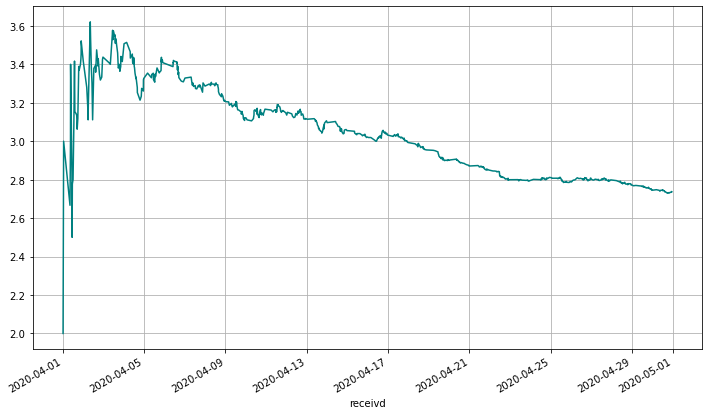

In [40]:
test_table_c[['receivd', 'z_cnt_ma']].set_index('receivd').plot(figsize=(12, 7), legend=None, c='teal')
plt.grid()
plt.show()

## Задание 9

В табличку Test_X вывести информацию по звонкам в КЦ (mart.calls).
Период: 1 - 14 июня 2020 г.
Поля: call_id, dt, duration, order_id, order_received, order_city_id, to_prep, to_client.

Посчитать медианную длительность звонков в разбивке на клиентские, препские, другие.

In [41]:
cur = connection.cursor()

In [42]:
cur.execute('''
SELECT call_id,
       dt,
       duration,
       order_id,
       order_received,
       order_city_id,
       to_prep,
       to_klient
FROM mart.calls calls
         JOIN dim.cities c ON c.id = calls.order_city_id
WHERE c.to_otchet = 'Учитывается'
  AND calls.date BETWEEN 20200601 AND 20200614;
''')

calls_data = pd.DataFrame(cur.fetchall(), columns = [x.name for x in cur.description])

In [43]:
calls_data.head()

,call_id,dt,duration,order_id,order_received,order_city_id,to_prep,to_klient
0,1442306316,2020-06-01 02:09:06,5,28395184,2020-05-31 09:19:33,795,0,1
1,1442306560,2020-06-01 02:10:57,13,28396236,2020-05-31 10:18:03,274,1,0
2,1442306983,2020-06-01 02:14:18,6,26516438,2020-02-28 05:10:19,274,0,1
3,1442311633,2020-06-01 03:01:44,45,15125162,2018-10-02 12:11:55,1285,0,1
4,1442316830,2020-06-01 04:11:44,1,28264725,2020-05-26 10:05:49,323,0,1


In [44]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95198 entries, 0 to 95197
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   call_id         95198 non-null  int64         
 1   dt              95198 non-null  datetime64[ns]
 2   duration        95198 non-null  int64         
 3   order_id        95198 non-null  int64         
 4   order_received  95198 non-null  datetime64[ns]
 5   order_city_id   95198 non-null  int64         
 6   to_prep         95198 non-null  int64         
 7   to_klient       95198 non-null  int64         
dtypes: datetime64[ns](2), int64(6)
memory usage: 5.8 MB


In [45]:
calls_data.groupby(['to_prep', 'to_klient']).size()

to_prep  to_klient
0        1            77500
1        0            17698
dtype: int64

In [46]:
calls_data['call_type'] = calls_data.apply(lambda x: 'Преп' if x['to_prep'] > x['to_klient'] else 'Клиент', axis=1)

In [47]:
calls_data.groupby(['call_type'])['duration'].median().to_frame()

,duration
call_type,
Клиент,32
Преп,35


## Задание 10

Табличка Test_X. Для каждого звонка вывести разницу в часах между датой звонка и датой поступления заказа.
С помощью функций ветвления, разделить звонки на 3 группы по длительности: short (менее 1 минуты), avrg (1-5 минут) и long (более 5 минут).

In [48]:
calls_data['received_to_call_hours'] = (calls_data['dt'] - calls_data['order_received']).astype('timedelta64[h]')

In [49]:
def split_duration(val): 
    if val <= 1: 
        return 'short'
    if val <= 5: 
        return 'avrg'
    return 'long'

In [50]:
calls_data['duration_type'] = calls_data['duration'].apply(split_duration)

In [51]:
calls_data.groupby(['duration_type'])['duration'].max()

duration_type
avrg        5
long     1200
short       1
Name: duration, dtype: int64

In [52]:
calls_data.head()

,call_id,dt,duration,order_id,order_received,order_city_id,to_prep,to_klient,call_type,received_to_call_hours,duration_type
0,1442306316,2020-06-01 02:09:06,5,28395184,2020-05-31 09:19:33,795,0,1,Клиент,16.0,avrg
1,1442306560,2020-06-01 02:10:57,13,28396236,2020-05-31 10:18:03,274,1,0,Преп,15.0,long
2,1442306983,2020-06-01 02:14:18,6,26516438,2020-02-28 05:10:19,274,0,1,Клиент,2253.0,long
3,1442311633,2020-06-01 03:01:44,45,15125162,2018-10-02 12:11:55,1285,0,1,Клиент,14582.0,long
4,1442316830,2020-06-01 04:11:44,1,28264725,2020-05-26 10:05:49,323,0,1,Клиент,138.0,short


## Задание 11

Создать на локальном компьютере экселевский файл "Python_test." Наполнить его табличкой из 500 строк. Столбцы: номер эксперимента (id) - рандомное число (от 1 до 10). Загрузить данные в Python. Сохранить ДатаФрейм как "rand_sample_11". Посчитать моду, среднее значение, а также максимальное число выпадений одного и того же числа подряд.

In [53]:
rand_sample_11 = pd.read_excel('rand_numbers.xlsx', squeeze=True)

In [54]:
rand_sample_11.mode()

0    10
dtype: int64

In [55]:
rand_sample_11.mean()

5.504

In [56]:
from itertools import groupby
from collections import defaultdict

In [57]:
num_freq = defaultdict(int)  

for num, seq in groupby(rand_sample_11.tolist()): 
    seq_length = len(list(seq))
    if seq_length > num_freq[num]: 
        num_freq[num] = seq_length

In [58]:
num_freq

defaultdict(int, {2: 3, 1: 3, 7: 4, 8: 2, 9: 2, 4: 2, 10: 2, 3: 2, 6: 3, 5: 3})

In [59]:
max(num_freq.values())

4

## Задание 12

С помощью любой из библиотек визуализации построить графическое распределение значений из датафрейма "rand_sample_11" прошлого задания. Максимальный показатель выделить отдельным цветом.

In [60]:
import seaborn as sns

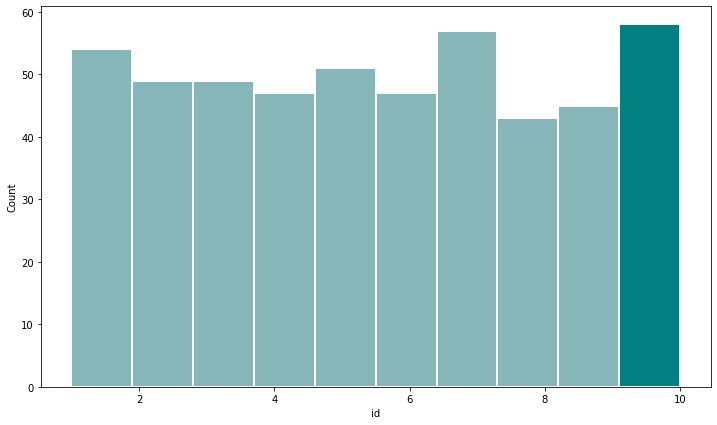

In [61]:
plt.figure(figsize=(12, 7))
hist = sns.histplot(rand_sample_11, color='cadetblue', edgecolor='w', lw=2)

max_freq = max([x.get_height() for x in hist.patches])

for x in hist.patches: 
    if x.get_height() == max_freq: 
        x.set_color('teal')
        x.set_edgecolor('w')

plt.show()